### Binary mixture phase diagrams using Flory-Huggins Free Energy


In [1]:
import numpy as np
DTYPE = np.float64 # Double precision
epsilon = np.finfo(DTYPE).eps

import numdifftools as nd

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

from numba import njit

import warnings
warnings.filterwarnings("ignore")

In [2]:
def floryHuggins_2components(phi, nu, nA, nB, chi):
    res = (phi*np.log(phi)/nA) + ((1-phi)*np.log(1-phi)/nB) + chi*phi*(1-phi)
    return res/nu

In [3]:
# concentration of the first component
n_phis = 1000
phis = np.linspace(epsilon, 1-epsilon, n_phis)

# Molecular parameters
nu = DTYPE(1)
nA = DTYPE(1)
nB = DTYPE(1)

# Flory parameter
chis = np.linspace(epsilon, 5, 100, dtype = DTYPE)
# chis = [2.116]

In [4]:
df_dphis_chis = [] # values of delF/delphi for all phis and chis. Indexed by the value of chi 

for chi in tqdm(chis):
    binodal_chi = [] # binodal points for this specific chi
    
    first_derivative = nd.Derivative(lambda phi: floryHuggins_2components(phi, nu, nA, nB, chi), n=1)
    df_dphis_chi = [] # values of delF/delphi for all phis for a particular chi
    
    for idx, phi in enumerate(phis):
        df_dphi_phi = first_derivative(phi) # value of delF/delphi for a particular phi for a particular chi
        df_dphis_chi.append(df_dphi_phi)    

    df_dphis_chis.append(df_dphis_chi)

100%|█████████████████████████████████████████| 100/100 [00:40<00:00,  2.50it/s]


In [5]:
binodals = []
for chi_idx, chi in enumerate(chis):
    binodals_chi = []
    for idx, df_dphi in enumerate(df_dphis_chis[chi_idx][:]):
        if np.sign(df_dphis_chis[chi_idx][idx]) == -1 and np.sign(df_dphis_chis[chi_idx][idx+1]) == 1:
            binodals_chi.append(phis[idx])
    binodals.append(binodals_chi)

In [7]:
ddf_ddphis_chis = [] # values of ddelF/ddelphi for all phis and chis. Indexed by the value of chi 

for chi in tqdm(chis):
    spinodal_chi = [] # spinodal points for this specific chi
    
    second_derivative = nd.Derivative(lambda phi: floryHuggins_2components(phi, nu, nA, nB, chi), n=2)
    ddf_ddphis_chi = [] # values of ddelF/ddelphi for all phis for a particular chi
    
    for idx, phi in enumerate(phis):
        ddf_ddphi_phi = second_derivative(phi) # value of ddelF/ddelphi for a particular phi for a particular chi
        ddf_ddphis_chi.append(ddf_ddphi_phi)    

    ddf_ddphis_chis.append(ddf_ddphis_chi)

100%|█████████████████████████████████████████| 100/100 [00:40<00:00,  2.44it/s]


In [8]:
spinodals = []
for chi_idx, chi in enumerate(chis):
    spinodals_chi = []
    for idx, ddf_ddphi in enumerate(ddf_ddphis_chis[chi_idx][:-1]):
        if (np.sign(ddf_ddphis_chis[chi_idx][idx]) == 1 and np.sign(ddf_ddphis_chis[chi_idx][idx+1]) == -1) or (np.sign(ddf_ddphis_chis[chi_idx][idx]) == -1 and np.sign(ddf_ddphis_chis[chi_idx][idx+1]) == 1):
            spinodals_chi.append(phis[idx])
            # print(idx, np.sign(df_dphis_chis[chi_idx][idx]), np.sign(df_dphis_chis[chi_idx][idx+1]), phis[idx])
    spinodals.append(spinodals_chi)

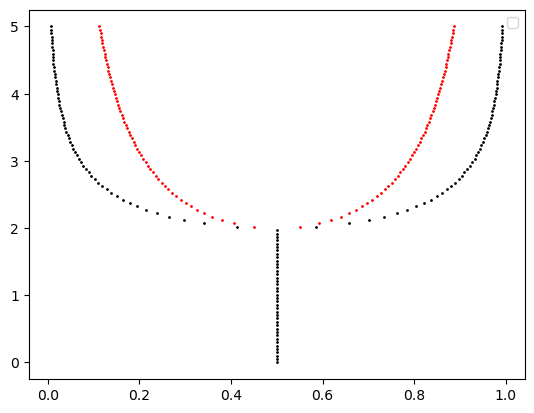

In [45]:
fig, ax= plt.subplots()

for idx, chi in enumerate(chis):
    for idx_binodal, critical_point in enumerate(binodals[idx]):
        ax.scatter(critical_point, chi, color = "k", s = 1)

    for idx_spinodal, critical_point in enumerate(spinodals[idx]):
        ax.scatter(critical_point, chi, color = "r", s = 1)
        
ax.legend(loc = "upper right")